In [1]:
# # # # Only for google collab to connect with google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# # # #!pip install imblearn

# # Copy file from google drive to google collab
!cp -r "/content/drive/MyDrive/assignment/Video_Games_5_LIWC_helpful.csv" "/content/"

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE, RFECV
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
import ast
from imblearn.under_sampling import RandomUnderSampler

### Read Data From Directory

In [4]:
# Global paramater to enable and disable code

SMOTE_ENABLE = True

# Random State - Please let the same as well for replicatility
random_state = 42
SEED = 42

# 设置随机参数
np.random.RandomState(SEED)

RandomState(MT19937) at 0x7F864CF567C0

In [5]:
# Change this directory to suit your own environment
df = pd.read_csv('Video_Games_5_LIWC_helpful.csv')

### Quick Check on Data

In [6]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,...,filler,AllPunc,Period,Comma,QMark,Exclam,Apostro,OtherP,quantile_1,helpful
0,1,False,"05 15, 2012",A1LMJ9W8UX1H5B,700026657,Rob NY,I've bought and played ALL of the ANNO games s...,SAY NO TO DRM!!,1337040000,28,...,0.0,9.92,3.82,4.58,0.00,0.00,1.53,0.00,28.0,1
1,5,True,"08 14, 2011",AN3YYDZAS3O1Y,700099867,Bob,Loved playing Dirt 2 and I thought the graphic...,A step up from Dirt 2 and that is terrific!,1313280000,11,...,0.0,20.24,14.29,2.38,0.00,1.19,0.00,2.38,12.0,0
2,5,False,"06 13, 2011",A2LQCBLLJVVR5T,700099867,Timmiley,This is a must have for any gamer. Codemasters...,BEST GRAPHICS OF ANY GAME SO FAR !!!!,1307923200,14,...,0.0,12.10,6.85,2.82,0.00,2.02,0.00,0.40,12.0,1
3,4,False,"12 26, 2012",A2GPRA9HHLOC4B,700026398,Wicasawakan,I will open with the Pros:\nReplayability - It...,Great game with design flaws,1356480000,12,...,0.0,18.00,8.35,2.78,0.56,0.00,2.41,3.90,12.0,1
4,3,True,"06 9, 2012",A1CB8HH9YJ2YZE,700099867,TheITMan,"This is a pretty fun game, but you have to buy...",Fun,1339200000,13,...,0.0,25.00,4.86,4.86,4.17,5.56,2.78,2.78,12.0,1


In [7]:
df.shape

(23531, 132)

In [8]:
for i in df.columns:
    print(i)

# !!! Need to remove: verified, reviewTime, reviewerID, asin, reviewerName, reviewText, summary, unixReviewTime, vote
# !!! style, image, Segment

overall
verified
reviewTime
reviewerID
asin
reviewerName
reviewText
summary
unixReviewTime
vote
style
image
Segment
WC
Analytic
Clout
Authentic
Tone
WPS
BigWords
Dic
Linguistic
function
pronoun
ppron
i
we
you
shehe
they
ipron
det
article
number
prep
auxverb
adverb
conj
negate
verb
adj
quantity
Drives
affiliation
achieve
power
Cognition
allnone
cogproc
insight
cause
discrep
tentat
certitude
differ
memory
Affect
tone_pos
tone_neg
emotion
emo_pos
emo_neg
emo_anx
emo_anger
emo_sad
swear
Social
socbehav
prosocial
polite
conflict
moral
comm
socrefs
family
friend
female
male
Culture
politic
ethnicity
tech
Lifestyle
leisure
home
work
money
relig
Physical
health
illness
wellness
mental
substances
sexual
food
death
need
want
acquire
lack
fulfill
fatigue
reward
risk
curiosity
allure
Perception
attention
motion
space
visual
auditory
feeling
time
focuspast
focuspresent
focusfuture
Conversation
netspeak
assent
nonflu
filler
AllPunc
Period
Comma
QMark
Exclam
Apostro
OtherP
quantile_1
helpful


In [9]:
## only interested in comment that have at least 10 vote
df = df[df['vote'] >= 10]
df = df[df['vote'] < 100]

In [10]:
df.vote.count()

22201

In [11]:
# this will show imbalance data
df.helpful.value_counts()

1    16857
0     5344
Name: helpful, dtype: int64

### Data Shuffle
This is required because the data is sort by asin

In [12]:
# Sort Data

df = df.sample(frac=1, random_state=random_state)
df = df.reset_index(drop=True)

In [13]:
df

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,...,filler,AllPunc,Period,Comma,QMark,Exclam,Apostro,OtherP,quantile_1,helpful
0,5,False,"05 10, 2016",A2MKWD9PM2BE6P,B00GODZYNA,Mr. Biggs,I sold my Xbox One just to get money to buy th...,Sold my Xbox One to get this and don't regret it,1462838400,17,...,0.00,18.28,4.84,5.38,0.00,1.61,3.76,2.69,11.50,1
1,2,False,"09 29, 2002",A2Y1D9287MGNQ4,B000065DGH,Steven Myers,"On the surface, this game is basically similar...",Marred by incessant cheese and stupid puzzles,1033257600,95,...,0.00,20.83,4.82,5.48,0.22,0.00,1.97,8.33,32.00,1
2,5,False,"12 25, 2000",A3CYIPLD9090ZK,B00004S99R,David Baker,"Unlike some ignorant gamers, my opinion is 100...","Ladies And Gentlemen, Let The Ranting Begin...",977702400,23,...,0.00,23.82,6.99,7.59,0.23,0.23,4.96,3.83,17.00,1
3,1,False,"02 23, 2016",A31JSNJ942L619,B0166QDJDQ,David T.,They took out all the fun stuff and you are li...,More boring than watching paint dry,1456185600,14,...,0.00,7.69,5.13,0.00,0.00,0.00,2.56,0.00,13.25,1
4,5,False,"03 11, 2014",A17TQYKJFNCUIB,B00DB9JYFY,Eric,THIS GAME WILL CHANGE EVERTHING. Try going bac...,Ouch! My Senses!,1394496000,16,...,0.00,29.32,5.76,13.61,0.00,1.05,1.57,7.33,13.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22196,3,False,"11 24, 2008",A1HQWPU9DCL9Q8,B001DF1AM8,J. Loscheider,"I downloaded the trial version, upgraded to th...","Though lacking slightly in finesse, very fun a...",1227484800,24,...,0.00,21.15,5.73,5.73,0.72,0.00,1.79,7.17,23.00,1
22197,5,True,"11 5, 2016",A17YRASSGAEALU,B01EZAA2ZI,Robert Quattrocchi,I am very confused about the hate this game is...,Well... I Liked It.,1478304000,31,...,0.00,17.47,5.42,3.31,0.30,0.00,6.63,1.81,13.00,1
22198,2,False,"06 7, 2006",A1FJ35EHNMPZC,B000BNJMIM,Jeremy R. Parker,The controls are very difficult and I understa...,Pretty overrated,1149638400,13,...,0.00,18.29,8.54,0.00,0.00,0.00,4.88,4.88,12.50,1
22199,5,False,"10 30, 2000",ANO1CVH3FQPH1,B00004W4QS,B. Cross,WOW!! The guys at EA did it again! Forget the ...,Vive La France!! (and this game too!!),972864000,18,...,0.25,20.05,5.51,6.77,0.25,1.25,1.25,5.01,14.00,1


## SMOTE Data Processing - Added by Kang

!!! MUST REMOVE quantile_1 BECAUSE IT'S RELATED TO HELPFUL'S DEFINITION

!!! THE RESULT WILL BE TOO GOOD 

Before SMOTE: (17760, 118)
After SMOTE: (27016, 118)


(array([13508.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 13508.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

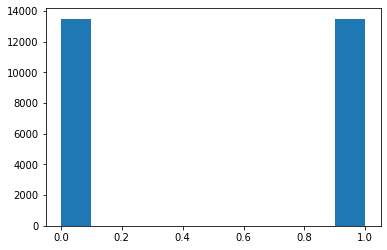

In [14]:
# This is the code for SMOTE - Kang

#dropping unwanted columns
# !!! MUST REMOVE quantile_1 BECAUSE IT'S RELATED TO HELPFUL'S DEFINITION
# !!! THE RESULT WILL BE TOO GOOD 
# cleaned_column_df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1','verified', 'reviewTime', 'reviewerID', 'asin',\
#                       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', \
#                       'vote', 'style', 'image', 'Segment', 'quantile_1'])

cleaned_column_df = df.drop(columns=['verified', 'reviewTime', 'reviewerID', 'asin',\
                       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', \
                       'vote', 'style', 'image', 'Segment', 'quantile_1'])

#Before SMOTE

X_train, X_test, y_train, y_test = train_test_split(cleaned_column_df.drop('helpful', axis=1), cleaned_column_df['helpful'], 
                                  test_size = 0.20, random_state=SEED)

print('Before SMOTE: {}'.format(X_train.shape))

sm = SMOTE(random_state=SEED)

# !!!! Please use the new x_train_smote and y_train_smote for fitting !!!!!
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train.ravel())


#After SMOTE

print('After SMOTE: {}'.format(X_train_smote.shape))


# ## StandardScale
# scaler = StandardScaler()

# # X_train_scaled = scaler.fit_transform(X_train_smote)
# # X_test_scaled = scaler.transform(X_test)

# X_train_smote = pd.DataFrame(data = X_train_scaled, columns=X_train_smote.columns)
# X_test = pd.DataFrame(data=X_test_scaled, columns=X_test.columns)



# Do not use checking df for any fitting or prediction     ## =============这里的呈现有问题
checking_df = X_train_smote.copy()

checking_df['helpful'] = y_train_smote

plt.hist(checking_df['helpful'])

# The graph will shown a balanced data set

#### Undersampling

In [15]:
# cleaned_column_df = df.drop(columns=['verified', 'reviewTime', 'reviewerID', 'asin',\
#                       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', \
#                       'vote', 'style', 'image', 'Segment', 'quantile_1'])

# # Use same code for prediction as well

# X_train, X_test, y_train, y_test = train_test_split(cleaned_column_df.drop('helpful', axis=1), cleaned_column_df['helpful'], 
#                                   test_size = 0.20, random_state=SEED, stratify=cleaned_column_df['helpful'])

# rus = RandomUnderSampler(random_state=SEED)
# X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# print('After Undersampling: {}'.format(X_train_rus.shape))

# # Do not use checking df for any fitting or prediction
# checking_df = X_train_rus.copy()

# checking_df['helpful'] = y_train_rus

# plt.hist(checking_df['helpful'])

# X_train_smote = X_train_rus
# y_train_smote = y_train_rus 

# checking_df = X_test.copy()

# checking_df['helpful'] =  y_test

# plt.hist(checking_df['helpful'])

## Feature importance


In [15]:
# This function is created so that we can reuse the code
# model = classification model 
# model_name = just string name to help to identify the rfe run in result csv file
# min = minimum features. Recommend 10 
# max = maximum features. Recommend 100
# step = incremental step. recommend 10
# rfe_fea_imp_df = to keep the result/which feature is important during each run
# fea_result_df = Get the accuracy result of the cross validation
def run_rfe(model,model_name, min,max,step, X_train, y_train,  rfe_fea_imp_df, fea_result_df):

    # This is to loop the features.
    for i in range(min,max,step):

          print('Number of feature: {}'.format(str(i)))

          print('Number of {} run for {} '.format(str(i),model_name))

          # This is the RFE selector
          selector = RFE(model, n_features_to_select=i, step=10)

          selector = selector.fit(X_train, y_train)

          features = X_train.columns[selector.support_]

          # To keep the details for future reference.
          # Mainly will need to focus to this once the best "model"
          # has been identified
          new_feature = { 'model':model_name,
              'no_feature' : selector.n_features_,
              'name_of_selected_feature': features,
              'rank_of_each_feature': selector.ranking_,
              'support_of_each_feature': selector.support_
          }

          
          rfe_fea_imp_df = rfe_fea_imp_df.append(new_feature, ignore_index = True)
          
          # cross validation to understand what is the mean accuracy of the using
          # these features. 
          print('Running Cross Validation for {}'.format(model_name))
          cv_accuracy = cross_val_score(model, X_train[features], y_train, cv=10,scoring='accuracy', verbose = 0)

          new_value = {'model': model_name, 
                    'num_feature': i, 
                    'features': features,
                    'accuracy': np.mean(cv_accuracy) }

          fea_result_df = fea_result_df.append(new_value, ignore_index = True)

    return  rfe_fea_imp_df, fea_result_df

In [16]:
# Function for feature importance run
# this function will run 10 till 100 with the step of 10
# each run will execute the top N prediction
# the feature important and accuracy will be returned from this function

# Also please make sure the feature_importance data frame with header 
# feature and value. (please to the file generated named: mi_fea_imp.csv)

def get_cv_accuracy_with_fea_imp(model,model_name,feature_importance,min,max,step, X_train, y_train, X_test, y_test, fea_result_df):
  # This is to loop the features.
    for i in range(min,max,step):
        features = feature_importance.loc[0:i-1,'Feature']

        print('Features select: {}'.format(features.values))

        print('Number of {} run for {} '.format(str(i),model_name))

          # This is the fitting - please make sure you model have fit function
        model.fit(X_train[features], y_train)

        print('Running Cross Validation for {}'.format(model_name))

          #ten fold cross validation
        cv_accuracy = cross_val_score(model, X_train[features], y_train, cv=10,scoring='accuracy', verbose = 0)

        new_value = {'model': model_name, 
                     'num_feature': i, 
                     'features': features.values,
                     'accuracy': np.mean(cv_accuracy) }

        fea_result_df = fea_result_df.append(new_value, ignore_index = True)
        
        print('done')

    return  fea_result_df

In [17]:
# Get mutual information
# please follow the csv format for other feature selection as well
mutual_info = mutual_info_classif(X_train_smote, y_train_smote, random_state = SEED)

mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train_smote.columns

mi_fea_imp = pd.DataFrame({'value':mutual_info,\
                                  'Feature':mutual_info.index})

# sorted for the get_feature_importance function
mi_fea_imp = mi_fea_imp.sort_values(by=['value'], ascending=False)

# drop index to make sure that can call with correct index number
mi_fea_imp.reset_index(drop=True, inplace=True)

# Save to your pc
file_name = 'mi_fea_imp.csv'
mi_fea_imp.to_csv(file_name)

In [18]:
mi_fea_imp

,value,Feature
0,0.262892,achieve
1,0.262081,cause
2,0.261905,insight
3,0.261006,negate
4,0.260710,discrep
...,...,...
113,0.016101,filler
114,0.015995,overall
115,0.013661,WC
116,0.012212,sexual


In [20]:
# Sample run for CV for feature selection and ML model

# Initialize fea_result_df variable
fea_result_df = pd.DataFrame({
     'model':[],
     'num_feature' : [],
     'features' : [],
     'accuracy': [],
     })

# Set the min, max and step
# min = minimun feature to start prediction with
# max = max feature to stop prediction with 
# step = the increment after each prediction
# e.g. min = 10, max = 30, step = 10, mean the process will only run twice and 
# stop at 20 because number of feature must be smaller than 30. 

min_fea = 10
# !!!for testing so only set 20, please change to 110 - to get up until 100 features
max_fea =110
step_fea = 10

# Read from CSV for MI feature importance
# Need to change to your own path
path = 'mi_fea_imp.csv'
mi_fea_imp = pd.read_csv(path)

# ==== XGBoost MI Feature Selection - Start =========================
xg_model = XGBClassifier(random_state = SEED)

model_name = 'XGBoost_mutual_information'

fea_result_df = get_cv_accuracy_with_fea_imp(model = xg_model,model_name = model_name,
                                       feature_importance = mi_fea_imp,min = min_fea,max = max_fea,step = step_fea, 
                                       X_train = X_train_smote, y_train = y_train_smote, 
                                       X_test = X_test, y_test=y_test, fea_result_df = fea_result_df)

# ==== XGBoost MI Feature Selection - End =========================

# ==== Random Forest MI Feature Selection - Start =========================
rf_model = RandomForestClassifier(random_state = SEED)

model_name = 'random_forest_mutual_information'

fea_result_df = get_cv_accuracy_with_fea_imp(model = rf_model,model_name = model_name,
                                       feature_importance = mi_fea_imp,min = min_fea,max = max_fea,step = step_fea, 
                                       X_train = X_train_smote, y_train = y_train_smote, 
                                       X_test = X_test, y_test=y_test, fea_result_df = fea_result_df)

# ==== Random Forest MI Feature Selection - End =========================

# ==== SVM MI Feature Selection - Start =========================
svm_model = svm.LinearSVC(random_state = SEED,dual=False)

model_name = 'SVM_mutual_information'

# for all dataset 
fea_result_df = get_cv_accuracy_with_fea_imp(model = svm_model,model_name = model_name,
                                       feature_importance = mi_fea_imp,min = min_fea,max = max_fea,step = step_fea, 
                                       X_train = X_train_smote, y_train = y_train_smote, 
                                       X_test = X_test, y_test=y_test, fea_result_df = fea_result_df )

# ==== SVM MI Feature Selection - End =========================

# ==== Naive Bayes MI Feature Selection - Start =========================
nb_model = MultinomialNB()

model_name = 'NB_mutual_information'

fea_result_df = get_cv_accuracy_with_fea_imp(model = nb_model,model_name = model_name,
                                       feature_importance = mi_fea_imp,min = min_fea,max = max_fea,step = step_fea,
                                      X_train = X_train_smote, y_train = y_train_smote, 
                                       X_test = X_test, y_test=y_test, fea_result_df = fea_result_df )

# ==== Navie Bayes MI Feature Selection - End =========================

# ====Logistic Regression MI Feature Selection  -Start ========================
lg_model = LogisticRegression(random_state=SEED, solver='lbfgs', max_iter=5000)

model_name = 'LG_mutual_information'

fea_result_df = get_cv_accuracy_with_fea_imp(model = lg_model,model_name = model_name,
                                       feature_importance = mi_fea_imp,min = min_fea,max = max_fea,step = step_fea,
                                      X_train = X_train_smote, y_train = y_train_smote, 
                                       X_test = X_test, y_test=y_test, fea_result_df = fea_result_df )


# ====Logistic Regression MI Feature Selection  -End ========================


print('This is final resul for {}'.format(model_name))

print(fea_result_df)

#Save to your pc
file_name = 'fea_result.csv'
fea_result_df.to_csv(file_name)

Features select: ['achieve' 'cause' 'insight' 'negate' 'discrep' 'emotion' 'allnone'
 'tentat' 'acquire' 'socbehav']
Number of 10 run for XGBoost_mutual_information 
Running Cross Validation for XGBoost_mutual_information
done
Features select: ['achieve' 'cause' 'insight' 'negate' 'discrep' 'emotion' 'allnone'
 'tentat' 'acquire' 'socbehav' 'motion' 'Apostro' 'certitude' 'work'
 'conj' 'Drives' 'number' 'focusfuture' 'differ' 'emo_pos']
Number of 20 run for XGBoost_mutual_information 
Running Cross Validation for XGBoost_mutual_information
done
Features select: ['achieve' 'cause' 'insight' 'negate' 'discrep' 'emotion' 'allnone'
 'tentat' 'acquire' 'socbehav' 'motion' 'Apostro' 'certitude' 'work'
 'conj' 'Drives' 'number' 'focusfuture' 'differ' 'emo_pos' 'tone_neg'
 'focuspresent' 'focuspast' 'power' 'visual' 'time' 'comm' 'adverb'
 'quantity' 'allure']
Number of 30 run for XGBoost_mutual_information 
Running Cross Validation for XGBoost_mutual_information
done
Features select: ['achiev

## random forest

In [19]:
rf_fea = RandomForestClassifier(random_state = SEED)
rf_fea.fit(X_train_smote, y_train_smote)
rf_fea_imp = rf_fea.feature_importances_

rf_fea_imp = pd.Series(rf_fea_imp)
rf_fea_imp.index = X_train_smote.columns

rf_fea_imp = pd.DataFrame({'value': rf_fea_imp,
                         'Feature':rf_fea_imp.index})

rf_fea_imp = rf_fea_imp.sort_values(by=['value'], ascending=False)
rf_fea_imp.reset_index(drop=True, inplace=True)

##save to PC
rf_fea_imp.to_csv('rf_fea_imp.csv')


In [22]:
fea_result_df = pd.read_csv('fea_result.csv')

min_fea = 10
# !!!for testing so only set 20, please change to 110 - to get up until 100 features
max_fea = 110
step_fea = 10

# Read from CSV for MI feature importance
# Need to change to your own path
path = 'rf_fea_imp.csv'
rf_fea_imp = pd.read_csv(path)

# ==== XGBoost MI Feature Selection - Start =========================
xg_model = XGBClassifier(random_state = SEED)

model_name = 'XGBoost_random_forest'

fea_result_df = get_cv_accuracy_with_fea_imp(model = xg_model,model_name = model_name,
                                       feature_importance = rf_fea_imp,min = min_fea,max = max_fea,step = step_fea, 
                                       X_train = X_train_smote, y_train = y_train_smote, 
                                       X_test = X_test, y_test=y_test, fea_result_df = fea_result_df)

# ==== XGBoost MI Feature Selection - End =========================

# ==== Random Forest MI Feature Selection - Start =========================
rf_model = RandomForestClassifier(random_state = SEED)

model_name = 'random_forest_randomforest'

fea_result_df = get_cv_accuracy_with_fea_imp(model = rf_model,model_name = model_name,
                                       feature_importance = rf_fea_imp,min = min_fea,max = max_fea,step = step_fea, 
                                       X_train = X_train_smote, y_train = y_train_smote, 
                                       X_test = X_test, y_test=y_test, fea_result_df = fea_result_df)

# ==== Random Forest MI Feature Selection - End =========================

# ==== SVM MI Feature Selection - Start =========================
svm_model = svm.LinearSVC(random_state = SEED,dual=False)

model_name = 'SVM_ranfom_forest'

# SVM have convergence issue, maybe need to do scaling using Scikit-Learn's StandardScaler   !!!这里有写道会有问题
# for all dataset 
fea_result_df = get_cv_accuracy_with_fea_imp(model = svm_model,model_name = model_name,
                                       feature_importance = rf_fea_imp,min = min_fea,max = max_fea,step = step_fea, 
                                       X_train = X_train_smote, y_train = y_train_smote, 
                                       X_test = X_test, y_test=y_test, fea_result_df = fea_result_df )

# ==== SVM MI Feature Selection - End =========================

# ==== Naive Bayes MI Feature Selection - Start =========================
nb_model = MultinomialNB()

model_name = 'NB_random_forest'

fea_result_df = get_cv_accuracy_with_fea_imp(model = nb_model,model_name = model_name,
                                       feature_importance = rf_fea_imp,min = min_fea,max = max_fea,step = step_fea,
                                      X_train = X_train_smote, y_train = y_train_smote, 
                                       X_test = X_test, y_test=y_test, fea_result_df = fea_result_df )

# # ==== Navie Bayes MI Feature Selection - End =========================

# ====Logistic Regression MI Feature Selection  -Start ========================
lg_model = LogisticRegression(random_state=SEED, solver='lbfgs', max_iter=5000)

model_name = 'LG_random_forest'

fea_result_df = get_cv_accuracy_with_fea_imp(model = lg_model,model_name = model_name,
                                       feature_importance = rf_fea_imp,min = min_fea,max = max_fea,step = step_fea,
                                      X_train = X_train_smote, y_train = y_train_smote, 
                                       X_test = X_test, y_test=y_test, fea_result_df = fea_result_df )


# ====Logistic Regression MI Feature Selection  -End ========================


# print('This is final resul for {}'.format(model_name))

print(fea_result_df)

#Save to your pc
file_name = 'fea_result.csv'
fea_result_df.to_csv(file_name)

Features select: ['WC' 'overall' 'Exclam' 'leisure' 'Lifestyle' 'WPS' 'Period' 'BigWords'
 'money' 'Tone']
Number of 10 run for XGBoost_random_forest 
Running Cross Validation for XGBoost_random_forest
done
Features select: ['WC' 'overall' 'Exclam' 'leisure' 'Lifestyle' 'WPS' 'Period' 'BigWords'
 'money' 'Tone' 'AllPunc' 'Perception' 'OtherP' 'tone_pos' 'Apostro'
 'prep' 'certitude' 'Comma' 'Authentic' 'article']
Number of 20 run for XGBoost_random_forest 
Running Cross Validation for XGBoost_random_forest
done
Features select: ['WC' 'overall' 'Exclam' 'leisure' 'Lifestyle' 'WPS' 'Period' 'BigWords'
 'money' 'Tone' 'AllPunc' 'Perception' 'OtherP' 'tone_pos' 'Apostro'
 'prep' 'certitude' 'Comma' 'Authentic' 'article' 'ipron' 'Analytic'
 'space' 'i' 'function' 'Clout' 'adj' 'allure' 'cause' 'conj']
Number of 30 run for XGBoost_random_forest 
Running Cross Validation for XGBoost_random_forest
done
Features select: ['WC' 'overall' 'Exclam' 'leisure' 'Lifestyle' 'WPS' 'Period' 'BigWords'
 '

### RFE

In [23]:
# we can consider using RFE, just take it as separate case: random_forest_rfe
# do not need to mix with other ML. We will just take as seperate case/model
# from here for comparison. :)
rfe_fea_imp_df = pd.DataFrame({
        'model':[],
     'no_feature':[],
      'name_of_selected_feature': [],
      'rank_of_each_feature' : [],
      'support_of_each_feature': []
     })

# # Initialize fea_result_df variable
# fea_result_df = pd.DataFrame({
#      'model':[],
#      'num_feature' : [],
#      'features' : [],
#      'accuracy': [],
#      })

min_fea = 10
max_fea =110
step_fea = 10

# using random forest as an example
# please remember to get the random state
rf_model = RandomForestClassifier(random_state = SEED)

# The result of running this function will be store in fea_result_df
# fea_result_df already declare avoce. 
rfe_fea_imp_df, fea_result_df = run_rfe(rf_model, 'Random_Forest_rfe', min_fea, \
                                max_fea, step_fea, X_train_smote, y_train_smote, \
                                rfe_fea_imp_df, fea_result_df)

file_name = '/content/drive/MyDrive/assignment/random_forest_rfe_fea_imp.csv'
rfe_fea_imp_df.to_csv(file_name)

file_name = 'random_forest_rfe_fea_imp.csv'
rfe_fea_imp_df.to_csv(file_name)

file_name = '/content/drive/MyDrive/assignment/Random_Forest_rfe_result.csv'
fea_result_df.to_csv(file_name)

file_name = 'fea_result.csv'
fea_result_df.to_csv(file_name)

Number of feature: 10
Number of 10 run for Random_Forest_rfe 
Running Cross Validation for Random_Forest_rfe
Number of feature: 20
Number of 20 run for Random_Forest_rfe 
Running Cross Validation for Random_Forest_rfe
Number of feature: 30
Number of 30 run for Random_Forest_rfe 
Running Cross Validation for Random_Forest_rfe
Number of feature: 40
Number of 40 run for Random_Forest_rfe 
Running Cross Validation for Random_Forest_rfe
Number of feature: 50
Number of 50 run for Random_Forest_rfe 
Running Cross Validation for Random_Forest_rfe
Number of feature: 60
Number of 60 run for Random_Forest_rfe 
Running Cross Validation for Random_Forest_rfe
Number of feature: 70
Number of 70 run for Random_Forest_rfe 
Running Cross Validation for Random_Forest_rfe
Number of feature: 80
Number of 80 run for Random_Forest_rfe 
Running Cross Validation for Random_Forest_rfe
Number of feature: 90
Number of 90 run for Random_Forest_rfe 
Running Cross Validation for Random_Forest_rfe
Number of feature: 

In [24]:
# using XGBoost as an example
# please remember to get the random state
xg_model = XGBClassifier(random_state = SEED)

# The result of running this function will be store in fea_result_df
# fea_result_df already declare avoce. 
rfe_fea_imp_df, fea_result_df = run_rfe(xg_model, 'XGBoost_rfe', min_fea, \
                                max_fea, step_fea, X_train_smote, y_train_smote, \
                                rfe_fea_imp_df, fea_result_df)

file_name = '/content/drive/MyDrive/assignment/XGBoost_rfe_fea_imp.csv'
rfe_fea_imp_df.to_csv(file_name)

file_name = '/content/drive/MyDrive/assignment/XGBoost_rfe_fea_result.csv'
fea_result_df.to_csv(file_name)

file_name = 'XGBoost_rfe_fea_imp.csv'
rfe_fea_imp_df.to_csv(file_name)

file_name = 'fea_result.csv'
fea_result_df.to_csv(file_name)

Number of feature: 10
Number of 10 run for XGBoost_rfe 
Running Cross Validation for XGBoost_rfe
Number of feature: 20
Number of 20 run for XGBoost_rfe 
Running Cross Validation for XGBoost_rfe
Number of feature: 30
Number of 30 run for XGBoost_rfe 
Running Cross Validation for XGBoost_rfe
Number of feature: 40
Number of 40 run for XGBoost_rfe 
Running Cross Validation for XGBoost_rfe
Number of feature: 50
Number of 50 run for XGBoost_rfe 
Running Cross Validation for XGBoost_rfe
Number of feature: 60
Number of 60 run for XGBoost_rfe 
Running Cross Validation for XGBoost_rfe
Number of feature: 70
Number of 70 run for XGBoost_rfe 
Running Cross Validation for XGBoost_rfe
Number of feature: 80
Number of 80 run for XGBoost_rfe 
Running Cross Validation for XGBoost_rfe
Number of feature: 90
Number of 90 run for XGBoost_rfe 
Running Cross Validation for XGBoost_rfe
Number of feature: 100
Number of 100 run for XGBoost_rfe 
Running Cross Validation for XGBoost_rfe


#### Best Model

In [35]:
fea_result_df = pd.read_csv('/content/drive/MyDrive/assignment/fea_result.csv')

In [36]:
## calculate the quantile 0.6 
fea_result_df['quantile_num'] = fea_result_df.groupby('model').accuracy.transform('quantile', .6)
fea_result_df['accept'] = fea_result_df.apply(lambda x:1 if x.accuracy >= x.quantile_num else 0, axis=1)

fea_result_accept = fea_result_df[fea_result_df['accept'] == 1]

## sort the value
fea_result_accept = fea_result_accept.sort_values(by='num_feature')
fea_result_accept.reset_index(drop=True, inplace=True)

## put the result to a file
file_name = 'fea_result_accept.csv'
fea_result_accept.to_csv(file_name)

In [37]:
fea_result_accept

,Unnamed: 0,Unnamed: 0.1,model,num_feature,features,accuracy,quantile_num,accept
0,80,NaN,NB_random_forest,10.0,['WC' 'overall' 'Exclam' 'leisure' 'Lifestyle'...,0.539458,0.535742,1
1,70,NaN,SVM_ranfom_forest,10.0,['WC' 'overall' 'Exclam' 'leisure' 'Lifestyle'...,0.571108,0.569768,1
2,90,NaN,LG_random_forest,10.0,['WC' 'overall' 'Exclam' 'leisure' 'Lifestyle'...,0.571405,0.570190,1
3,81,NaN,NB_random_forest,20.0,['WC' 'overall' 'Exclam' 'leisure' 'Lifestyle'...,0.537978,0.535742,1
4,73,NaN,SVM_ranfom_forest,40.0,['WC' 'overall' 'Exclam' 'leisure' 'Lifestyle'...,0.570664,0.569768,1
5,93,NaN,LG_random_forest,40.0,['WC' 'overall' 'Exclam' 'leisure' 'Lifestyle'...,0.570849,0.570190,1
6,74,NaN,SVM_ranfom_forest,50.0,['WC' 'overall' 'Exclam' 'leisure' 'Lifestyle'...,0.569813,0.569768,1
7,85,NaN,NB_random_forest,60.0,['WC' 'overall' 'Exclam' 'leisure' 'Lifestyle'...,0.535831,0.535742,1
8,45,45.0,LG_mutual_information,60.0,['achieve' 'cause' 'insight' 'negate' 'discrep...,0.537163,0.536563,1
9,115,NaN,XGBoost_rfe,60.0,"Index(['overall', 'WC', 'Tone', 'BigWords', 'i...",0.794695,0.792452,1


## step 2: choose final model

In [86]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [87]:
# Refresh result_df

result_df = []

In [88]:
def get_model_accuracy(model,model_name,feature_importance, num_feature, X_train, y_train, X_test, y_test, result_df):
    
    
    print('the runing model is :', model_name)
    
    ## get the features
    feature = feature_importance.loc[0:num_feature-1, 'Feature']
    
    model.fit(X_train[feature], y_train)
    
    ## make prediction
    prediction = model.predict(X_test[feature])
    
    ## the metrics value
    accuracy = accuracy_score(y_test, prediction)
    precision = precision_score(y_test, prediction)
    recall = recall_score(y_test, prediction)
    f1 = f1_score(y_test, prediction)
    

    new_value = {'model': model_name,
                'num_feature': num_feature,
                'accuracy': accuracy,
                'precision': precision,
                'recall': recall,
                'f1': f1}
    
    result_df = result_df.append(new_value, ignore_index=True)
    
    return result_df

In [89]:
# Initialize fea_result_df variable
result_df = pd.DataFrame({
    'model':[],
    'num_feature' : [],
    'accuracy': [],
    'precision': [],
    'recall' : [],
    'f1': [],
     })

# Read from CSV for MI feature importance
path = 'mi_fea_imp.csv'
mi_fea_imp = pd.read_csv(path)


## Number of features
num_feature = 70

# ==== XGBoost MI Feature Selection - Start =========================
xg_model = XGBClassifier(random_state = SEED)

model_name = 'XGBoost_mutual_information'

result_df = get_model_accuracy(model = xg_model, model_name = model_name,
                              feature_importance = mi_fea_imp, num_feature = 70,
                              X_train = X_train_smote, y_train = y_train_smote, X_test = X_test, y_test = y_test, result_df = result_df)


# ==== XGBoost MI Feature Selection - End =========================

# ==== Random Forest MI Feature Selection - Start =========================
rf_model = RandomForestClassifier(random_state = SEED)

model_name = 'random_forest_mutual_information'

result_df = get_model_accuracy(model = rf_model, model_name = model_name,
                              feature_importance = mi_fea_imp, num_feature = 70,
                              X_train = X_train_smote, y_train = y_train_smote, X_test = X_test, y_test = y_test, result_df = result_df)

# ==== Random Forest MI Feature Selection - End =========================

# ==== SVM MI Feature Selection - Start =========================
svm_model = svm.LinearSVC(random_state = SEED,dual=False)

model_name = 'SVM_mutual_information'

result_df = get_model_accuracy(model = svm_model, model_name = model_name,
                              feature_importance = mi_fea_imp, num_feature = 60,
                              X_train = X_train_smote, y_train = y_train_smote, X_test = X_test, y_test = y_test, result_df = result_df)

# ==== SVM MI Feature Selection - End =========================

# ==== Naive Bayes MI Feature Selection - Start =========================
nb_model = MultinomialNB()

model_name = 'NB_mutual_information'

result_df = get_model_accuracy(model = nb_model, model_name = model_name,
                              feature_importance = mi_fea_imp, num_feature = 70,
                              X_train = X_train_smote, y_train = y_train_smote, X_test = X_test, y_test = y_test, result_df = result_df)
# ==== Navie Bayes MI Feature Selection - End =========================

# ====Logistic Regression MI Feature Selection  -Start ========================
lg_model = LogisticRegression(random_state=SEED, solver='lbfgs', max_iter=5000)

model_name = 'LG_mutual_information'

result_df = get_model_accuracy(model = lg_model, model_name = model_name,
                              feature_importance = mi_fea_imp, num_feature = 60,
                              X_train = X_train_smote, y_train = y_train_smote, X_test = X_test, y_test = y_test, result_df = result_df)


# ====Logistic Regression MI Feature Selection  -End ========================

print(result_df)

#Save to your pc
file_name = 'result.csv'
result_df.to_csv(file_name)

the runing model is : XGBoost_mutual_information
the runing model is : random_forest_mutual_information
the runing model is : SVM_mutual_information
the runing model is : NB_mutual_information
the runing model is : LG_mutual_information
                              model  num_feature  accuracy  precision  \
0        XGBoost_mutual_information         70.0  0.579149   0.746174   
1  random_forest_mutual_information         70.0  0.695564   0.769646   
2            SVM_mutual_information         60.0  0.544922   0.771242   
3             NB_mutual_information         70.0  0.523981   0.784169   
4             LG_mutual_information         60.0  0.545147   0.772224   

     recall        f1  
0  0.669752  0.705901  
1  0.851000  0.808281  
2  0.563750  0.651371  
3  0.508809  0.617168  
4  0.562855  0.651123  


In [90]:
result_df

,model,num_feature,accuracy,precision,recall,f1
0,XGBoost_mutual_information,70.0,0.579149,0.746174,0.669752,0.705901
1,random_forest_mutual_information,70.0,0.695564,0.769646,0.851000,0.808281
2,SVM_mutual_information,60.0,0.544922,0.771242,0.563750,0.651371
3,NB_mutual_information,70.0,0.523981,0.784169,0.508809,0.617168
4,LG_mutual_information,60.0,0.545147,0.772224,0.562855,0.651123


In [91]:
# read the result_df file
result_df = pd.read_csv('result.csv')

# Read from CSV for MI feature importance
rf_fea_imp = pd.read_csv('rf_fea_imp.csv')


## Number of features
num_feature = 70

# Comment out because this is not relavant testing
#
#
# # ==== XGBoost MI Feature Selection - Start =========================
# xg_model = XGBClassifier(random_state = SEED)

# model_name = 'XGBoost_random_forest'

# result_df = get_model_accuracy(model = xg_model, model_name = model_name,
#                               feature_importance = rf_fea_imp, num_feature = num_feature,
#                               X_train = X_train_smote, y_train = y_train_smote, X_test = X_test, y_test = y_test, result_df = result_df)


# # ==== XGBoost MI Feature Selection - End =========================

# # ==== Random Forest MI Feature Selection - Start =========================
# rf_model = RandomForestClassifier(random_state = SEED)

# model_name = 'random_forest_random_forest'

# result_df = get_model_accuracy(model = rf_model, model_name = model_name,
#                               feature_importance = rf_fea_imp, num_feature = num_feature,
#                               X_train = X_train_smote, y_train = y_train_smote, X_test = X_test, y_test = y_test, result_df = result_df)

# ==== Random Forest MI Feature Selection - End =========================

# ==== SVM MI Feature Selection - Start =========================
svm_model = svm.LinearSVC(random_state = SEED,dual=False)

model_name = 'SVM_random_forest'

result_df = get_model_accuracy(model = svm_model, model_name = model_name,
                              feature_importance = rf_fea_imp, num_feature = 10,
                              X_train = X_train_smote, y_train = y_train_smote, X_test = X_test, y_test = y_test, result_df = result_df)

# ==== SVM MI Feature Selection - End =========================

# ==== Naive Bayes MI Feature Selection - Start =========================
nb_model = MultinomialNB()

model_name = 'NB_ranfom_forest'

result_df = get_model_accuracy(model = nb_model, model_name = model_name,
                              feature_importance = rf_fea_imp, num_feature = 10,
                              X_train = X_train_smote, y_train = y_train_smote, X_test = X_test, y_test = y_test, result_df = result_df)
# ==== Navie Bayes MI Feature Selection - End =========================

# ====Logistic Regression MI Feature Selection  -Start ========================
lg_model = LogisticRegression(random_state=SEED, solver='lbfgs', max_iter=5000)

model_name = 'LG_random_forest'

result_df = get_model_accuracy(model = lg_model, model_name = model_name,
                              feature_importance = rf_fea_imp, num_feature = 10,
                              X_train = X_train_smote, y_train = y_train_smote, X_test = X_test, y_test = y_test, result_df = result_df)


# ====Logistic Regression MI Feature Selection  -End ========================

print(result_df)

#Save to your pc
file_name = 'result.csv'
result_df.to_csv(file_name)

the runing model is : SVM_random_forest
the runing model is : NB_ranfom_forest
the runing model is : LG_random_forest
   Unnamed: 0                             model  num_feature  accuracy  \
0         0.0        XGBoost_mutual_information         70.0  0.579149   
1         1.0  random_forest_mutual_information         70.0  0.695564   
2         2.0            SVM_mutual_information         60.0  0.544922   
3         3.0             NB_mutual_information         70.0  0.523981   
4         4.0             LG_mutual_information         60.0  0.545147   
5         NaN                 SVM_random_forest         10.0  0.548075   
6         NaN                  NB_ranfom_forest         10.0  0.477820   
7         NaN                  LG_random_forest         10.0  0.548300   

   precision    recall        f1  
0   0.746174  0.669752  0.705901  
1   0.769646  0.851000  0.808281  
2   0.771242  0.563750  0.651371  
3   0.784169  0.508809  0.617168  
4   0.772224  0.562855  0.651123  
5   0

In [92]:
result_df

,Unnamed: 0,model,num_feature,accuracy,precision,recall,f1
0,0.0,XGBoost_mutual_information,70.0,0.579149,0.746174,0.669752,0.705901
1,1.0,random_forest_mutual_information,70.0,0.695564,0.769646,0.851000,0.808281
2,2.0,SVM_mutual_information,60.0,0.544922,0.771242,0.563750,0.651371
3,3.0,NB_mutual_information,70.0,0.523981,0.784169,0.508809,0.617168
4,4.0,LG_mutual_information,60.0,0.545147,0.772224,0.562855,0.651123
5,NaN,SVM_random_forest,10.0,0.548075,0.772764,0.567632,0.654502
6,NaN,NB_ranfom_forest,10.0,0.477820,0.786429,0.422216,0.549446
7,NaN,LG_random_forest,10.0,0.548300,0.773746,0.566736,0.654257


In [93]:
def get_rfe_fea_support(model_name, fea_imp_file_name):

  #  Read from CSV for MI feature importance
  fea_result_accept = pd.read_csv('fea_result_accept.csv')

  # Automatically ready best number of feature from 'fea_result_accept.csv'
  best_setup = fea_result_accept[(fea_result_accept['model'] == model_name)]

  best_setup.sort_values(by=['num_feature'])

  num_fea = best_setup['num_feature'].iloc[0]

  print('Predict {} with {} Features'.format(model_name, num_fea))

  file_name = fea_imp_file_name

  rf_fea_imp = pd.read_csv(fea_imp_file_name)

  rf_fea_imp = rf_fea_imp[rf_fea_imp['no_feature'] == num_fea]

  fea_rfe = rf_fea_imp['support_of_each_feature'].iloc[0]
                
  for character in '[]':

    fea_rfe = fea_rfe.replace(character, '')

  fea_rfe = fea_rfe.split()

  fea_rfe = np.array([ast.literal_eval(x.title()) for x in fea_rfe])

  return fea_rfe

#### HyperParameter

In [94]:
# To avoid running hyperparameter

HYPERPARAMETER = False

In [96]:
def process_hy_result(model, data_cato_name, best_param, best_score, hy_result_df):

  new_value = {
      'model':model,
        'data_cato_name': data_cato_name,
        'best_parameter': best_param,
        'best_score': best_score,
        }

  hy_result_df = hy_result_df.append(new_value,ignore_index = True)

  return hy_result_df

In [98]:
if HYPERPARAMETER == True:

      import xgboost as xgb
      from datetime import datetime
      from sklearn.model_selection import RandomizedSearchCV

      # Parameter based on 
      # PM2.5 Prediction Based on Random Forest, XGBoost,
      # and Deep Learning Using Multisource Remote
      # Sensing Data
      # Mehdi Zamani Joharestani 1,2,†
      # , Chunxiang Cao 1,2,*, Xiliang Ni 1,2,†
      # , Barjeece Bashir 1,2 and
      # Somayeh Talebiesfandarani 1,2

      # Read from Result DF
      result_df = pd.read_csv('result.csv')

      hy_result_df = pd.DataFrame({
            'model':[],
              'data_cato_name': [],
              'best_parameter': [],
              })
      
      rf_hyper_grid = {
                  'bootstrap': [True, False],
      'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
      'max_features': ['auto', 'sqrt'],
      'min_samples_leaf': [1, 2, 4, 5, 10],
      'min_samples_split': [1, 2,4,  5, 10],
                  }

      xg_hyper_grid = {
            'max_depth': [2,3,5,7,10],
            'gamma': [0, 0.1, 0.2, 0.3, 0.4, 1.0, 1.5, 2.0],
            'learning_rate': [0.025,0.05,0.1,0.2,0.3],
            'subsample': [0.15, 0.5, 0.75, 1.0],
            'colsample_bylevel': [0.1, 0.2, 0.25, 0.5, 0.75, 1.0],
            }

      #======= Random Forest Hyper Parameter ============= Start

      fea_support = get_rfe_fea_support(model_name='Random_Forest_rfe', fea_imp_file_name = '/content/drive/MyDrive/assignment/random_forest_rfe_fea_imp.csv')

      features = X_train_smote.columns[fea_support]

      rf_model = RandomForestClassifier(random_state = SEED, verbose=1, n_jobs=-1)

      rf_rand_cv = RandomizedSearchCV(estimator=rf_model,
                param_distributions=rf_hyper_grid,
                cv=10, n_iter=60,
                verbose = 1, random_state = SEED)


      print('Number of Feature:' + str(len(features)))


      rf_rand_cv.fit(X_train_smote[features], y_train_smote)

      print('Random Forest Best score reached: {} with params: {} '.format(rf_rand_cv.best_score_, rf_rand_cv.best_params_))

      now = datetime.now()
      current_time = now.strftime("%H:%M:%S")

      print("Current Time =", current_time)

      hy_result_df = process_hy_result('Random_Forest_rfe', 'video_game', rf_rand_cv.best_params_, rf_rand_cv.best_score_, hy_result_df)

      # ========= Random Forest MI Hyper Parameter ========== Start

      rf_model = RandomForestClassifier(random_state = SEED, verbose=1, n_jobs=-1)

      rf_rand_cv = RandomizedSearchCV(estimator=rf_model,
          param_distributions=rf_hyper_grid,
          cv=10, n_iter=60,
          verbose = 1, random_state = SEED)

      #get feature importance from mi_fea_imp
      # random forest have best model using 70 features
      features = mi_fea_imp.loc[0:70-1,'Feature']

      print('Number of Feature:' + str(len(features)))

      rf_rand_cv.fit(X_train_smote[features], y_train_smote)

      print('Random Forest MI Best score reached: {} with params: {} '.format(rf_rand_cv.best_score_, rf_rand_cv.best_params_))

      now = datetime.now()
      current_time = now.strftime("%H:%M:%S")

      print("Current Time =", current_time)

      hy_result_df = process_hy_result('Random_Forest_mi', 'video_game', rf_rand_cv.best_params_, rf_rand_cv.best_score_, hy_result_df)

      #======= XGBoost HyperParameter -=================== Start

      fea_support = get_rfe_fea_support(model_name='XGBoost_rfe', fea_imp_file_name = 'XGBoost_rfe_fea_imp.csv')

      features = X_train_smote.columns[fea_support]

      now = datetime.now()

      current_time = now.strftime("%H:%M:%S")

      print('Start XGBoost Hyperparameter')
      print("Current Time =", current_time)

      #Set up the random search with 5-fold cross validation

      xgb_clf = xgb.XGBClassifier(random_state = SEED, verbose=2)

      xgb_rand_cv = RandomizedSearchCV(estimator=xgb_clf,
                param_distributions=xg_hyper_grid,
                cv=10, n_iter=60,
                verbose = 2, random_state = SEED)

      print('Number of Feature:' + str(len(features)))

      xgb_rand_cv.fit(X_train_smote[features], y_train_smote)

      print('XGBoost Best score reached: {} with params: {} '.format(xgb_rand_cv.best_score_, xgb_rand_cv.best_params_))

      now = datetime.now()
      current_time = now.strftime("%H:%M:%S")

      print("Current Time =", current_time)

      hy_result_df = process_hy_result('XGBoost_rfe', 'video_game', xgb_rand_cv.best_params_, xgb_rand_cv.best_score_, hy_result_df)

      now = datetime.now()

      current_time = now.strftime("%H:%M:%S")

      print('END XGBoost Hyperparameter')
      print("Current Time =", current_time)

      #Save to your pc
      file_name = 'hy_result_df.csv'
      hy_result_df.to_csv(file_name)

      #Save to your pc
      file_name = '/content/drive/MyDrive/assignment/hy_result_df.csv'
      hy_result_df.to_csv(file_name)

#### RFE Prediction

In [99]:
# Read from Result DF
result_df = pd.read_csv('result.csv')

fea_support = get_rfe_fea_support(model_name='Random_Forest_rfe', fea_imp_file_name = '/content/drive/MyDrive/assignment/random_forest_rfe_fea_imp.csv')

features = X_train_smote.columns[fea_support]

# Random Forest - RFE Hyper Start =======================

print('Fitting RF RFE Hyper')

rf_model = RandomForestClassifier(random_state = SEED)

rf_params = {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': False} 

rf_model.set_params(**rf_params)

rf_model.fit(X_train_smote[features], y_train_smote)

print('Predicting RF RFE Hyper')
## make prediction
prediction = rf_model.predict(X_test[features])

## the metrics value
accuracy = accuracy_score(y_test, prediction)
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)
f1 = f1_score(y_test, prediction)

print('Result: RF RFE Hyper')
new_value = {'model': 'random_forest_rfe_hy',
            'num_feature': len(X_train_smote[features].columns),
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1}

result_df = result_df.append(new_value, ignore_index=True)

# Random Forest - RFE Hyper End =======================

# Random Forest - RFE Start =======================

rf_model = RandomForestClassifier(random_state = SEED)

rf_model.fit(X_train_smote[features], y_train_smote)

print('Predicting RF RFE')
## make prediction
prediction = rf_model.predict(X_test[features])

## the metrics value
accuracy = accuracy_score(y_test, prediction)
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)
f1 = f1_score(y_test, prediction)

print('Result: RF RFE')
new_value = {'model': 'random_forest_rfe',
            'num_feature': len(X_train_smote[features].columns),
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1}

result_df = result_df.append(new_value, ignore_index=True)

# Random Forest - RFE End =======================

# XGBOoost - RFE Hyper Start ======================

fea_support = get_rfe_fea_support(model_name='XGBoost_rfe', fea_imp_file_name = '/content/drive/MyDrive/assignment/XGBoost_rfe_fea_imp.csv')

features = X_train_smote.columns[fea_support]

print('Fitting XGB RFE Hyper')

xg_params = {'subsample': 1.0, 'max_depth': 10, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bylevel': 0.1} 

xg_model = XGBClassifier(random_state = SEED)

xg_model.set_params(**xg_params)

xg_model.fit(X_train_smote[features], y_train_smote)

print('Predicting XGB RFE Hyper')
## make prediction
prediction = xg_model.predict(X_test[features])

## the metrics value
accuracy = accuracy_score(y_test, prediction)
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)
f1 = f1_score(y_test, prediction)

print('Result: XGB RFE Hyper')
new_value = {'model': 'XGBoost_rfe_hy',
            'num_feature': len(X_train_smote[features].columns),
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1}

result_df = result_df.append(new_value, ignore_index=True)

# XGBOoost - RFE Hyper End ======================

# XGBOoost - RFE Start ======================

fea_support = get_rfe_fea_support(model_name='XGBoost_rfe', fea_imp_file_name = '/content/drive/MyDrive/assignment/XGBoost_rfe_fea_imp.csv')

features = X_train_smote.columns[fea_support]

print('Fitting XGB RFE')

xg_model = XGBClassifier(random_state = SEED)

xg_model.fit(X_train_smote[features], y_train_smote)

print('Predicting XGB RFEr')
## make prediction
prediction = xg_model.predict(X_test[features])

## the metrics value
accuracy = accuracy_score(y_test, prediction)
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)
f1 = f1_score(y_test, prediction)

print('Result: XGB RFE')
new_value = {'model': 'XGBoost_rfe',
            'num_feature': len(X_train_smote[features].columns),
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1}

result_df = result_df.append(new_value, ignore_index=True)

# XGBOoost - RFE Hyper End ======================

# ====== Random Forest - MI ======

# ==== Random Forest MI Feature Selection - Start =========================

rf_mi_params = {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 70, 'bootstrap': False}  

rf_mi_model = RandomForestClassifier(random_state = SEED)

rf_mi_model.set_params(**rf_mi_params)

model_name = 'random_forest_mutual_information_hyper'

result_df = get_model_accuracy(model = rf_mi_model, model_name = model_name,
                              feature_importance = mi_fea_imp, num_feature = 70,
                              X_train = X_train_smote, y_train = y_train_smote, X_test = X_test, y_test = y_test, result_df = result_df)

#Save to your pc
file_name = 'result.csv'
result_df.to_csv(file_name)

Predict Random_Forest_rfe with 70.0 Features
Fitting RF RFE Hyper
Predicting RF RFE Hyper
Result: RF RFE Hyper
Predicting RF RFE
Result: RF RFE
Predict XGBoost_rfe with 60.0 Features
Fitting XGB RFE Hyper
Predicting XGB RFE Hyper
Result: XGB RFE Hyper
Predict XGBoost_rfe with 60.0 Features
Fitting XGB RFE
Predicting XGB RFEr
Result: XGB RFE
the runing model is : random_forest_mutual_information_hyper


In [100]:
result_df

,Unnamed: 0,Unnamed: 0.1,model,num_feature,accuracy,precision,recall,f1
0,0.0,0.0,XGBoost_mutual_information,70.0,0.579149,0.746174,0.669752,0.705901
1,1.0,1.0,random_forest_mutual_information,70.0,0.695564,0.769646,0.851000,0.808281
2,2.0,2.0,SVM_mutual_information,60.0,0.544922,0.771242,0.563750,0.651371
3,3.0,3.0,NB_mutual_information,70.0,0.523981,0.784169,0.508809,0.617168
4,4.0,4.0,LG_mutual_information,60.0,0.545147,0.772224,0.562855,0.651123
5,5.0,NaN,SVM_random_forest,10.0,0.548075,0.772764,0.567632,0.654502
6,6.0,NaN,NB_ranfom_forest,10.0,0.477820,0.786429,0.422216,0.549446
7,7.0,NaN,LG_random_forest,10.0,0.548300,0.773746,0.566736,0.654257
8,NaN,NaN,random_forest_rfe_hy,70.0,0.734069,0.768583,0.926247,0.840081
9,NaN,NaN,random_forest_rfe,70.0,0.722585,0.770647,0.899970,0.830303


#### Cross Validation Accuracy Graph

In [84]:
import seaborn as sns

def show_values(axs, orient="v", space=.01, decimal=4):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                if decimal != 0: 
                  value = '{:.4f}'.format(p.get_height())
                else:
                  value = '{:.0f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.4f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)


def show_combine_pred_result_histogram():

  file_name = '/content/drive/MyDrive/assignment/fea_result_cleaned.csv'
  pred_result = pd.read_csv(file_name, encoding='latin1')

  sns.set(font_scale=2)

  plt.figure(figsize = (20,20))
  lp = sns.lineplot(data=pred_result, x='num_feature', y='accuracy', hue='model',ci=None, marker='o')
  lp.legend(loc='upper right',bbox_to_anchor=(1.32, 1))
  plt.title('Top N Feature Cross Validation Accuracy for Model and Feature Selection')
  plt.xlabel('Number of Feature')
  plt.ylabel('Accuracy')
  plt.show()

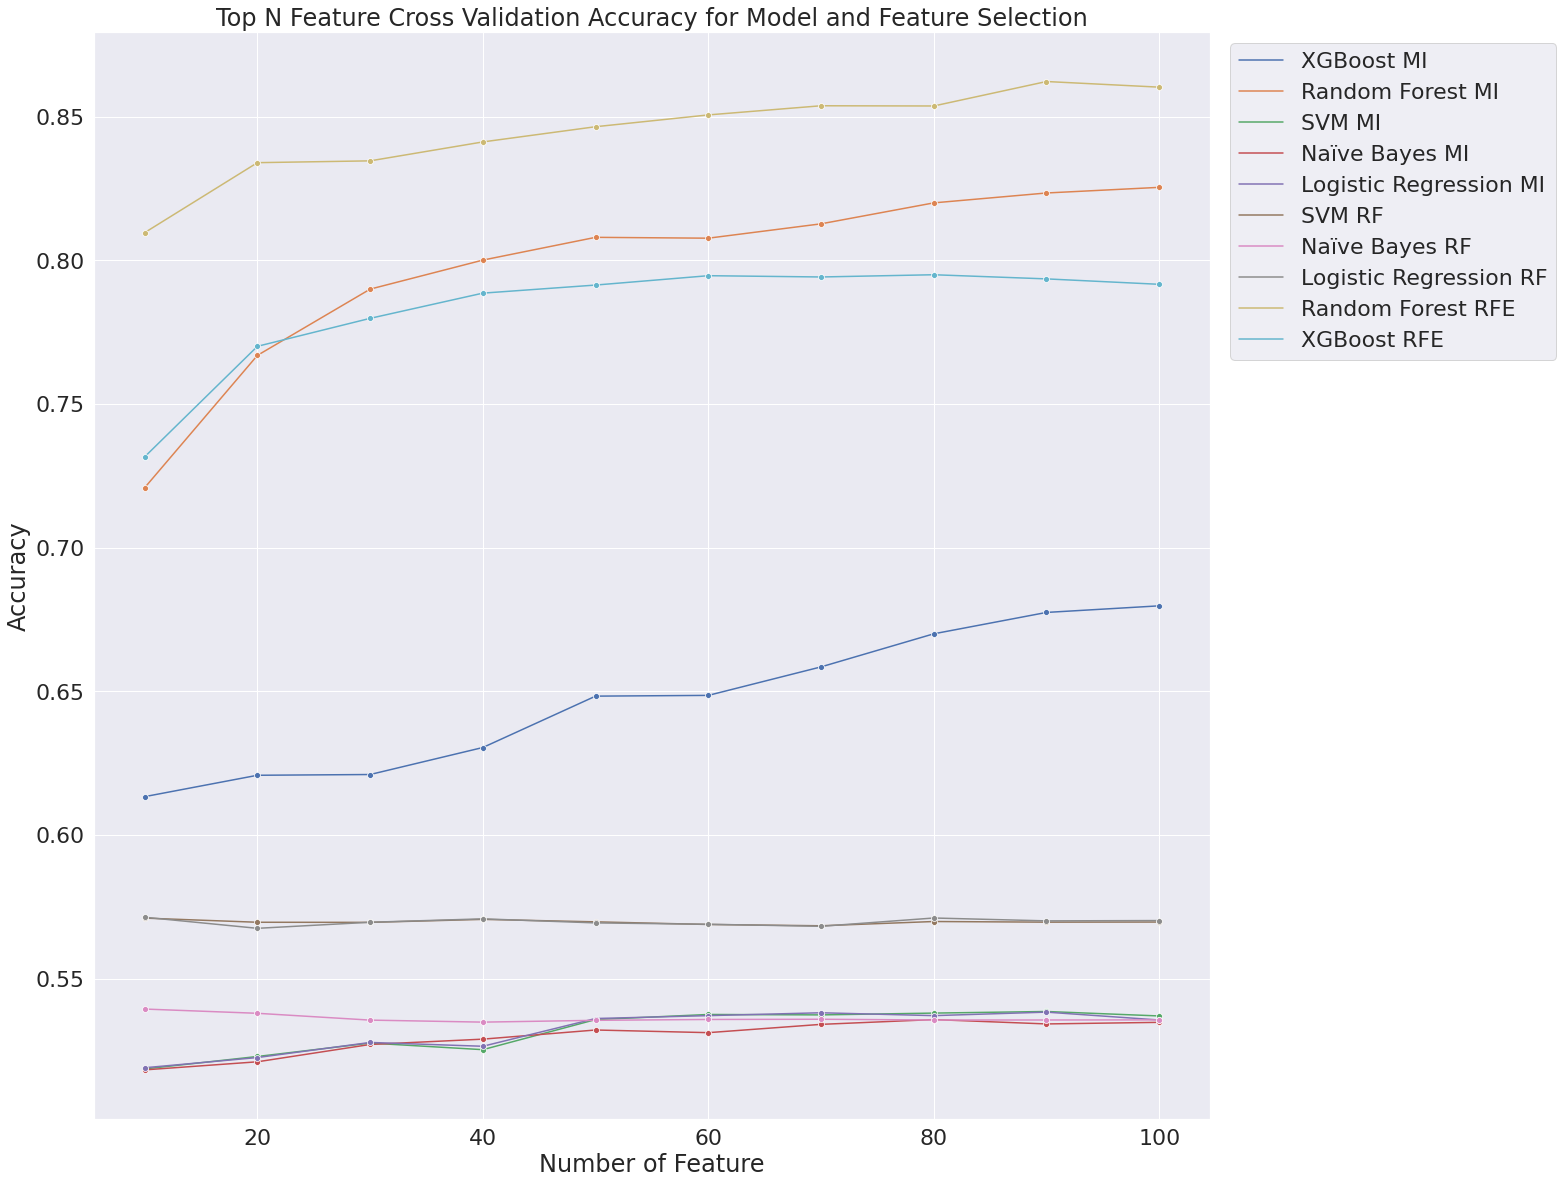

In [85]:
show_combine_pred_result_histogram()